# Función para detectar outliers

In [ ]:
def identify_outliers(dataframe, any_outs = True, coef = 1.5):

  #detect floats and ints variables
  listado_de_variables = list(dataframe.select_dtypes('float').columns) + list(dataframe.select_dtypes('int').columns)

  #create new_df that we will use as return for the function
  new_df = dataframe.copy()

  #for each variable in listado_de_variables create new column "VariableName_outs" with 1 if the value is a outlier and 0 if it is not
  for i in listado_de_variables:
    q1 = dataframe[i].quantile(0.25)
    q3 = dataframe[i].quantile(0.75)
    iqr = q3-q1
    fence = coef*iqr
    new_column = i+"_outs"
    new_df[new_column] = np.where((dataframe[i] > q3 + fence) | (dataframe[i] < q1-fence), 1, 0)
  
  #creamos una nueva columna que pueda decir si la fila completa tiene algún outlier o no lo tiene
  if any_outs:
    new_df['any_outs'] = np.where(new_df.filter(regex=("_outs*")).sum(axis = 1) > 0, 1, 0)
  return new_df

# Combinatoria de todos los posibles casos sin repetición

In [ ]:
import itertools

#Este será nuestra lista de listas con combinaciones posibles
combinaciones = []

#generamos el loop y almacenamos los resultados en "combinaciones"
stuff = listado
for L in range(13, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        combinaciones.append(list(subset))
combinaciones

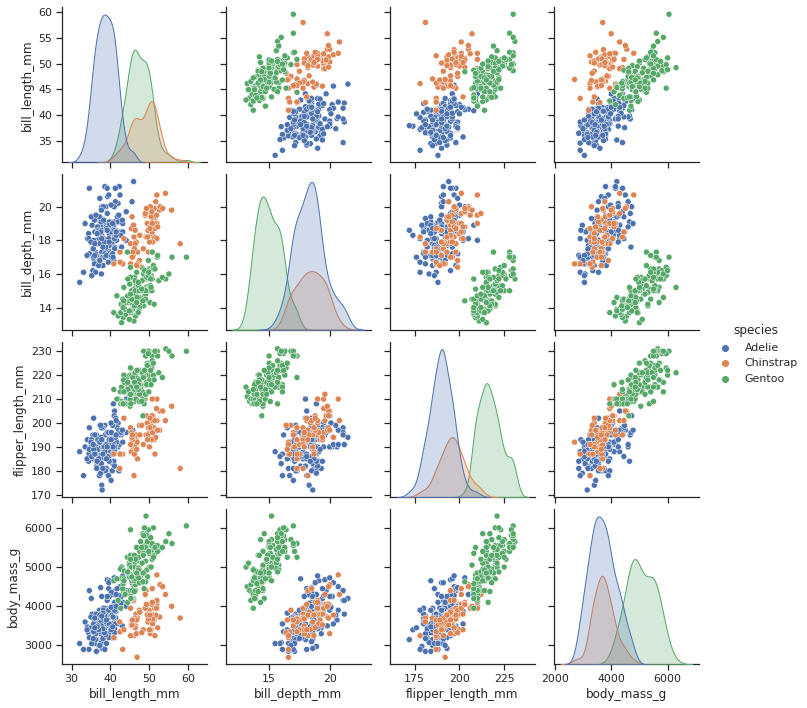

In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

#También vi en datacamp que se pueden usar factorplots, pero no los veo en seaborn.pydata.org

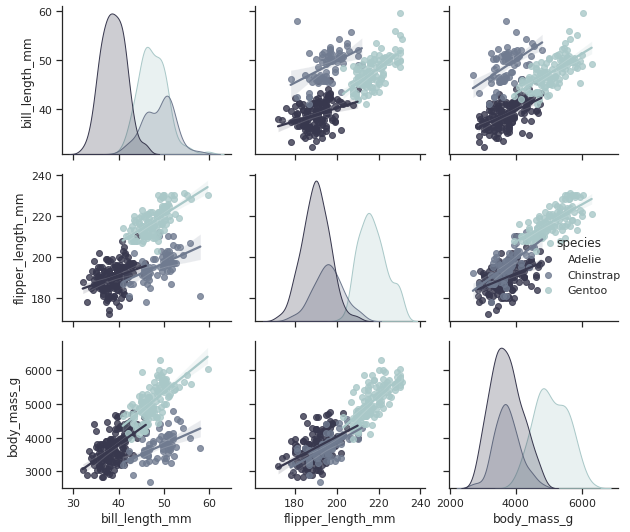

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("penguins")

# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["bill_length_mm", "flipper_length_mm", "body_mass_g"],
             kind='reg',
             palette='bone',
             diag_kind = 'kde',
             hue='species')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


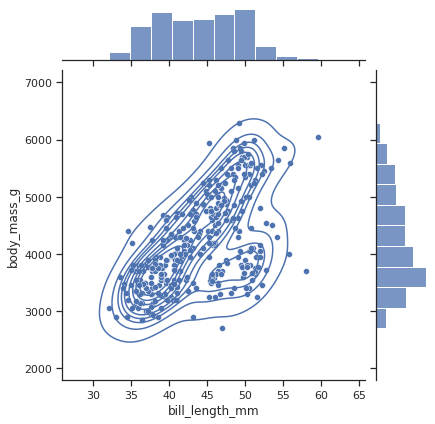

In [12]:
g = (sns.jointplot(x="bill_length_mm",
             y="body_mass_g",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
)
g.plot_joint(sns.kdeplot)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


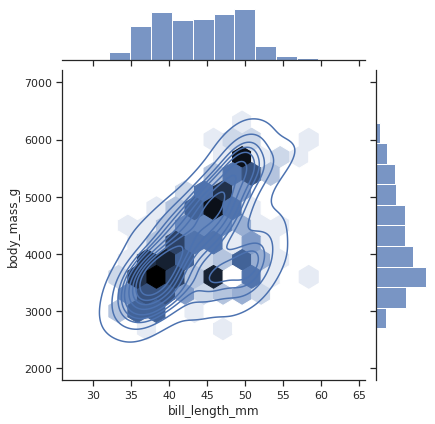

In [13]:
g = (sns.jointplot(x="bill_length_mm",
             y="body_mass_g",
             kind='hex',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
)
g.plot_joint(sns.kdeplot)